# Generative Reflection (GR) kernel

In this notebook we provide examples of how tilings made with the generative reflection (GR) kernel can be used

In [2]:
from hypertiling import HyperbolicTiling, TilingKernels
from hypertiling.graphics.plot import plot_tiling

import matplotlib.cm as cmap
import numpy as np
import time

## Example 1: The hypertiling logo

In [3]:
t = HyperbolicTiling(7, 3, 3, kernel=TilingKernels.GenerativeReflection) 

In [4]:
ct = np.zeros(len(t))
for i, poly in enumerate(t):
    val = np.real(poly[0])-np.imag(poly[0])
    ct[i] = np.sign(val)*(np.abs(val))**1.4

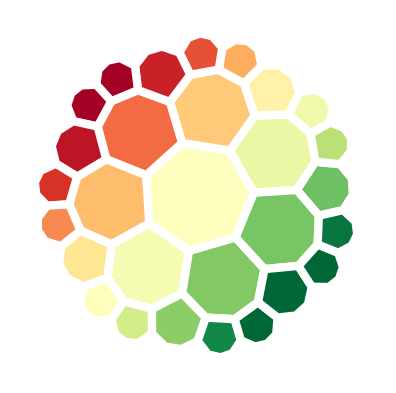

In [5]:
plot_tiling(t, ct, cmap=cmap.RdYlGn, edgecolor="w", lw=5, clim=[-1,1]);

## Example 2: Save as vector graphics

Just like every other kernel, tilings constructed with GR can be stored as vector graphic images

In [6]:
from hypertiling import HyperbolicTiling
import hypertiling.graphics.svg as svg

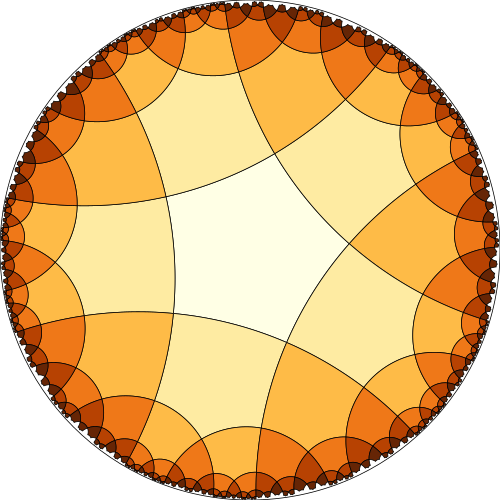

In [8]:
# generate tiling
tiling = HyperbolicTiling(5, 4, 6, kernel="GR")

# we color the tiling by layer
colors = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

# query layer information
tiling_colors = [colors[tiling.get_reflection_level(i) % len(colors)] for i in range(len(tiling))]

# create and draw svg image
tiling_svg = svg.make_svg(tiling, tiling_colors, unitcircle=True, cmap="YlOrBr")
svg.draw_svg(tiling_svg)

## Example 3: Voter model

In this simple statistic model, cells will always take on the color of the majority of their adjacent cells

In [9]:
from hypertiling.graphics.plot import plot_tiling

import random
import matplotlib.pyplot as plt
import matplotlib.cm as cmap

In [10]:
t1 = time.time()

p, q, n = 7, 3, 11
t = HyperbolicTiling(p, q, n, kernel="GR")

print(f"Generation of {len(t)} polygons took {round(time.time() - t1,5)} s")

Generation of 76616 polygons took 0.06269 s


Extract the neighbours

In [11]:
nbrs = t.get_nbrs_list()

Initialize the voter model with random state space

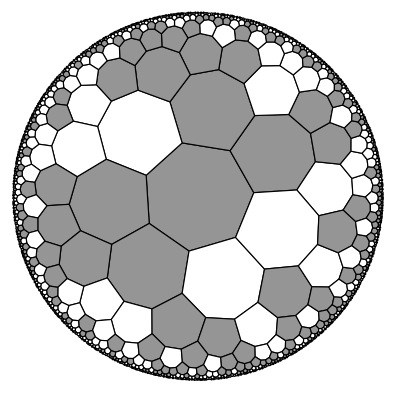

In [10]:
states = np.random.randint(0, 2, size=len(t))
plot_tiling(t, states, cmap=cmap.Greys, edgecolor="k", cutoff=0.01, lw=0.7, clim=[0,2]);

Run the model and display resulting configuration

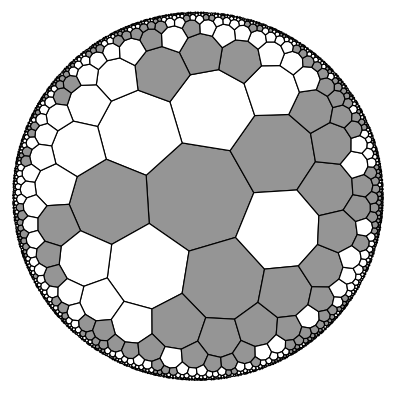

In [11]:
its = 1e5 # number of iterations

for i in range(int(its)):
    index = int(len(t) * np.random.random())
    sum_ = sum([states[nbr] for nbr in t.get_nbrs_mapping(index)])
    if sum_ > p // 2:
        states[index] = 1
    else:
        states[index] = 0
    
plot_tiling(t, states, cmap=cmap.Greys, edgecolor="k", cutoff=0.01, lw=0.7, clim=[0,2]);

## Further methods

## get_reflection_level

The natural defintion of layers of the GR-family is slightly differnt than for the SR  kernel family. Only for tilings with $q=3$ the layers match. Therefore, GR comes with two differnt get_layer functions. The first, namely the `get_layer method`, requieres addtional calculations as it refers to the traditional defintion of layers (same SR family). This method is used in Example 2. To access the natural layer definition of the GR-family, `get_reflection_level` can be used. In the following we want to compare this definitions on a $(3,7,5)$ tiling and a $(7,3,5)$ tiling. 

In [1]:
from hypertiling import HyperbolicTiling, TilingKernels
import hypertiling.graphics.svg as svg

# some colors values
colors = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

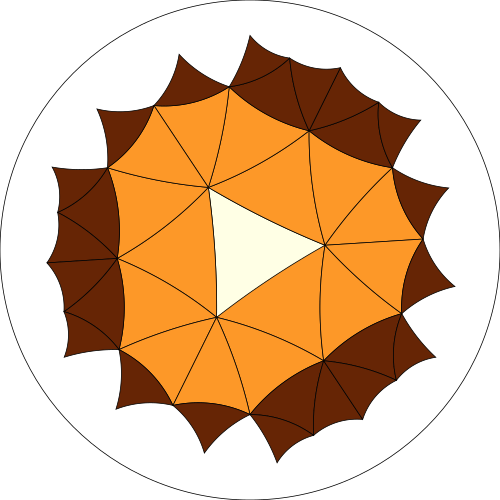

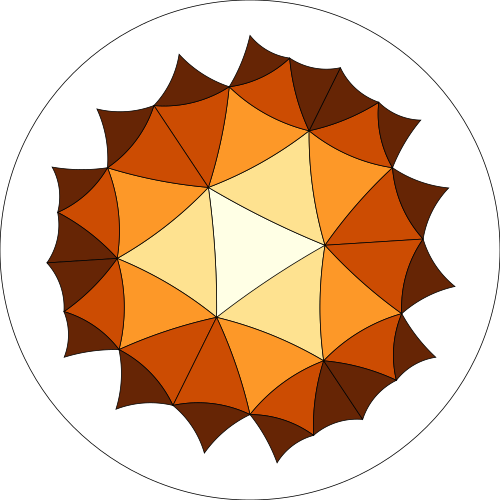

In [2]:
# For q != 3, the definitons do not match
t = HyperbolicTiling(3, 7, 5, kernel=TilingKernels.GenerativeReflection)

# plot traditional layers
t.map_layers()  # if not called manually, get_layer will call it automatically in its first call
tiling_colors = [colors[t.get_layer(i) % len(colors)] for i in range(len(t))]
tiling_svg = svg.make_svg(t, tiling_colors, unitcircle=True, cmap="YlOrBr")
svg.draw_svg(tiling_svg)

# plot reflective layers
tiling_colors = [colors[t.get_reflection_level(i) % len(colors)] for i in range(len(t))]
tiling_svg = svg.make_svg(t, tiling_colors, unitcircle=True, cmap="YlOrBr")
svg.draw_svg(tiling_svg)

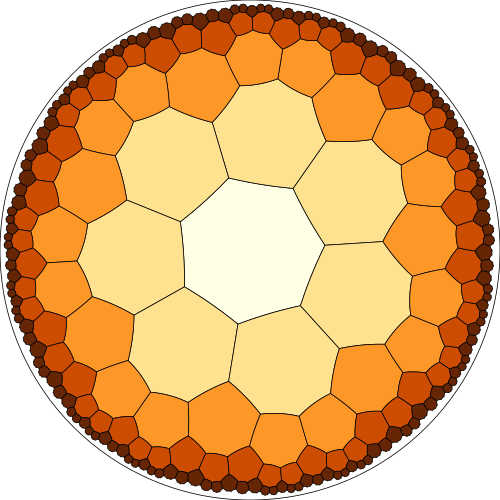

In [3]:
# For q == 3, the definitons match
# (we display only one)
t = HyperbolicTiling(7, 3, 5, kernel=TilingKernels.GenerativeReflection)

# plot traditional layers
# t.map_layers()  get_layer will call it automatically in its first call
tiling_colors = [colors[t.get_layer(i) % len(colors)] for i in range(len(t))]
tiling_svg = svg.make_svg(t, tiling_colors, unitcircle=True, cmap="YlOrBr")
svg.draw_svg(tiling_svg)

# plot reflective layers
tiling_colors = [colors[t.get_reflection_level(i) % len(colors)] for i in range(len(t))]
tiling_svg = svg.make_svg(t, tiling_colors, unitcircle=True, cmap="YlOrBr")
#svg.draw_svg(tiling_svg)

## check_integrity
The GR Kernel provides with check_integrity a simple approach to verify the integrity of the tiling and monitor numerical uncertainties.

In [25]:
from hypertiling import HyperbolicTiling, TilingKernels
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [26]:
t = HyperbolicTiling(5, 4, 5, kernel=TilingKernels.GenerativeReflection)
t.check_integrity()

Integrity ensured till index 13 at layer 4


This is the expected result. It can be explained by the fact, that the polygon with index 2 is the first polygon of the last layer and thus is missing some neighbors. We can either verify this pretty easily by accessing a protected attribute of GR (fastest and best method), by testing (more intuitive, still fast) or ploting (most intuitive but very slow).

In [27]:
print(f"Expect complete set of neighbors until cell {t._sector_lengths_cumulated[-2]}")  

Expect complete set of neighbors until cell 13


For demonstration purposes, we access a protected attribute here, `_sector_lengths_cumulated`. If you dont know what protected means: dont touch it! It is an array that stores the start indices of each constructed as well as the next theoretical layer. Therefore, `t._sector_lengths_cumulated[-2]` accesses the first polygon of the last constructed layer.

In [28]:
print(t.get_reflection_level(12))

3


We can see, that the polygon with index 12 (= 13 - 1) is in the previous layer and thus the polygon with index is the first polygon in the layer with index 6 (layers start counting at 0 and thus in the 5th layer). Therefore, we expect it to miss some of its neighbors causing the message 

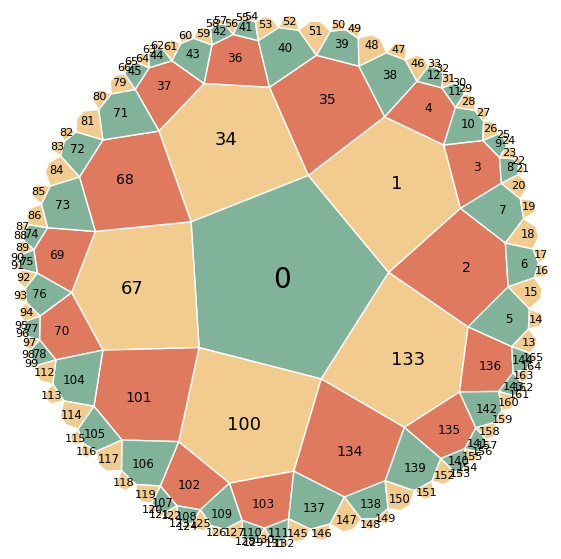

In [57]:
fig_ax = plt.subplots(figsize=(7,7))
fig_ax[1].set_xlim(-1, 1)
fig_ax[1].set_ylim(-1, 1)
fig_ax[1].set_box_aspect(1)

colors = ["#81b29a", "#f2cc8f", "#e07a5f"]

for idx, pgon in enumerate(t):

    # color cells based on layer
    poly_layer = t.get_reflection_level(idx)
    color = colors[poly_layer % len(colors)]
    
    # extract coordinates
    coords_complex = pgon[1:]
    coords = np.array([(np.real(e), np.imag(e)) for e in coords_complex])
    
    # font size depending on radial distance
    center = pgon[0]
    dist = np.abs(center) + 0.0001
    fsize = np.minimum(7+1/dist**3,20)
    
    # draw cell patches and labels
    patch = mpl.patches.Polygon(coords, fc=color, ec="#FFFFFF")
    fig_ax[1].add_patch(patch)
    fig_ax[1].text(np.real(pgon[0]), np.imag(pgon[0]), str(idx), fontsize=fsize, ha="center", va="center")
    
plt.axis("off")
plt.show()

As can be seen, the polygon with index 13 is the first polygon in the last layer and thus lacking its outer neighbors.

## find

The find method takes some complex number as input (interpreted as coordinate in the Poincare disk) and determins the polyon this coordinates belong to. However, due to numerical uncertainties coordinates very close to the boundary of polygons might be not detected.

In [22]:
from hypertiling import HyperbolicTiling, TilingKernels
import matplotlib.pyplot as plt
import matplotlib as mpl
import hypertiling.graphics.svg as svg
import random
import numpy as np

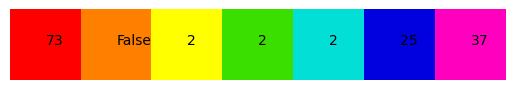

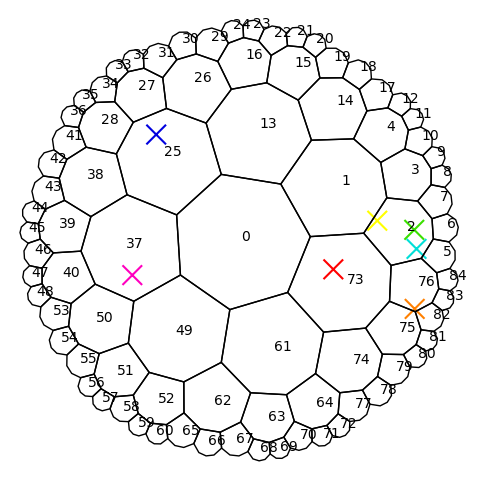

In [24]:
t = HyperbolicTiling(7, 3, 4, kernel=TilingKernels.GenerativeReflection)

# draw random points and assign colors
colors = [[(255, 0, 0),
          (255, 128, 0),
          (255, 255, 0),
          (58, 223, 0),
          (1, 223, 215),
          (1, 1, 223),
          (255, 0, 191)]]

xs = [2 * random.random() - 1 for i in range(len(colors[0]))]
points = []
for x in xs:
    range_ = np.sqrt(1 - x**2)
    y = range_ * random.random() - range_ / 2
    points.append(complex(x, y))

# show colors and their cells according to the tiling
plt.imshow(colors)
for i, point in enumerate(points):
    index = t.find(point)
    plt.text(1 * i, 0, str(index))
plt.axis("off")
plt.show()


# plot tiling and scatter in points
fig_ax = plt.subplots(figsize=(6,6))
fig_ax[1].set_xlim(-1, 1)
fig_ax[1].set_ylim(-1, 1)
fig_ax[1].set_box_aspect(1)

     
# add points
rgb2hex = lambda r,g,b: f"#{int(r):02x}{int(g):02x}{int(b):02x}"
plt.scatter(np.real(points), np.imag(points), s=200, marker="x", c=[rgb2hex(*color) for color in colors[0]])
plt.axis("off")
            
# plot tiling
for polygon_index, pgon in enumerate(t):
    patch = mpl.patches.Polygon(np.array([(np.real(e), np.imag(e)) for e in pgon[1:]]),
                                    facecolor="#00000000", edgecolor="#000000")
    fig_ax[1].add_patch(patch)
    fig_ax[1].text(np.real(pgon[0]), np.imag(pgon[0]), str(polygon_index))

plt.show()